<a href="https://colab.research.google.com/github/RuchitaSalunkhe/OIBSIP_EmailSpamDetection_with_ML/blob/main/Task_4_Emailspamdetection_With_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam.csv


In [ ]:
# Step 1: Load the dataset
file_path = 'spam.csv'  # Replace 'spam.csv' with the actual path to your CSV file

# Try different encodings to handle the UnicodeDecodeError
encodings = ['utf-8', 'latin-1', 'ISO-8859-1']
for encoding in encodings:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [ ]:
# Map 'ham' to 0 and 'spam' to 1 in the 'v1' column
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
# Step 3: Split data into training and testing sets
X = data['v2']  # Email content
y = data['v1']  # Labels (0 for ham, 1 for spam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Build the Spam Detector Model
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [ ]:
# Step 5: Evaluate the Model
X_test_vectorized = vectorizer.transform(X_test)
predictions = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))

Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
import re
import string

# Step 6: Deploy the Spam Detector
def preprocess_text(text):
    """
    Function to preprocess the email text.
    :param text: The email content as a string.
    :return: Preprocessed text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Add more preprocessing steps if necessary (e.g., removing stop words, stemming, etc.)

    return text

def predict_spam(email_content):
    """
    Function to predict if an email is spam or not.
    :param email_content: The email content as a string.
    :return: 1 if spam, 0 if not spam.
    """
    # Preprocess the email content
    preprocessed_email = preprocess_text(email_content)

    # Vectorize the preprocessed text
    content_vectorized = vectorizer.transform([preprocessed_email])

    # Make prediction
    prediction = model.predict(content_vectorized)
    return prediction[0]

# Example usage:
email_example = "SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV"
result = predict_spam(email_example)
if result == 1:
    print("This email is classified as spam.")
else:
    print("This email is not spam.")

This email is classified as spam.


In [ ]:
# Another Example:
email_example = "WHO ARE YOU SEEING?"
result = predict_spam(email_example)
if result == 1:
    print("This email is classified as spam.")
else:
    print("This email is not spam.")


This email is not spam.


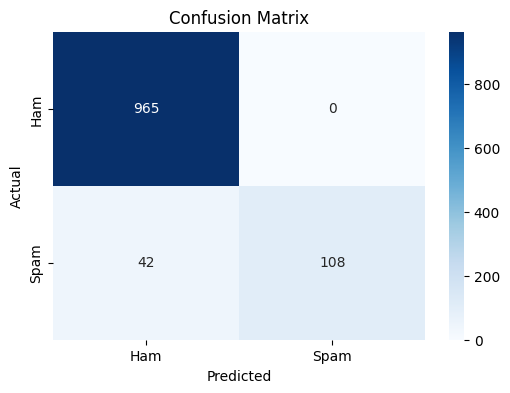

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
# code for confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The heatmap will show the true positive, true negative, false positive, and false negative classifications for the spam and ham categories.